In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [51]:
from google.colab import files
upload = files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata (1).xlsx


In [63]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


#EDA

In [64]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [65]:
df.shape

(42, 2)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [67]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<Axes: >

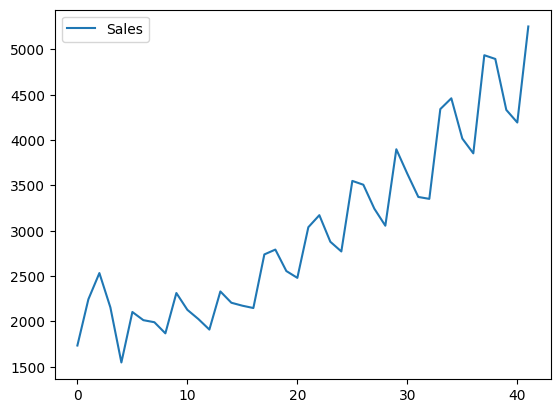

In [68]:
df.plot()

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

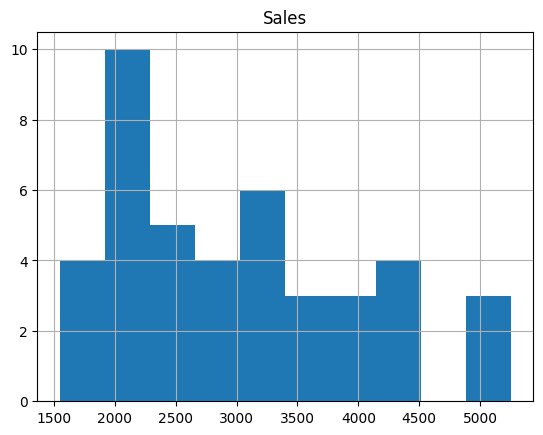

In [69]:
df.hist()

<Axes: ylabel='Density'>

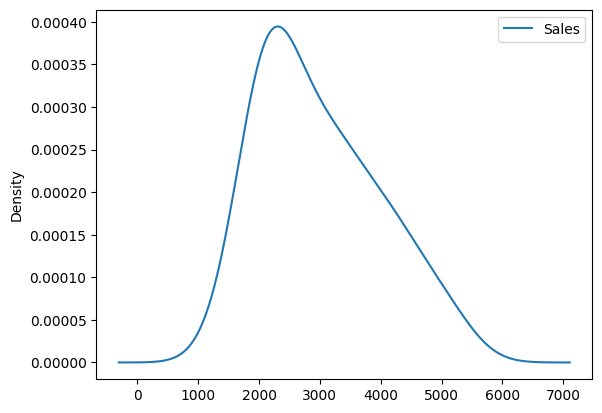

In [77]:
df.plot(kind='kde')

In [73]:
df['Quarters'] = 0
for i in range(42):
    n = df['Quarter'][i]
    df['Quarters'][i] = n[0:2]

df['Year'] = 0
for i in range(42):
    n = df['Quarter'][i]
    df['Year'][i] = n[3:5]
df.head()

<ipython-input-73-5a2595bab14e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarters'][i] = n[0:2]
<ipython-input-73-5a2595bab14e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][i] = n[3:5]


,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [74]:
dummy = pd.DataFrame(pd.get_dummies(df['Quarters']))
df1 = pd.concat((df, dummy), axis=1)
df1.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [75]:
df1["t"]=np.arange(1,43)
df1["t_square"]=np.square(df1["t"])
df1["Log_Sales"]=np.log(df1["Sales"])
df1.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<Axes: xlabel='Quarters', ylabel='Year'>

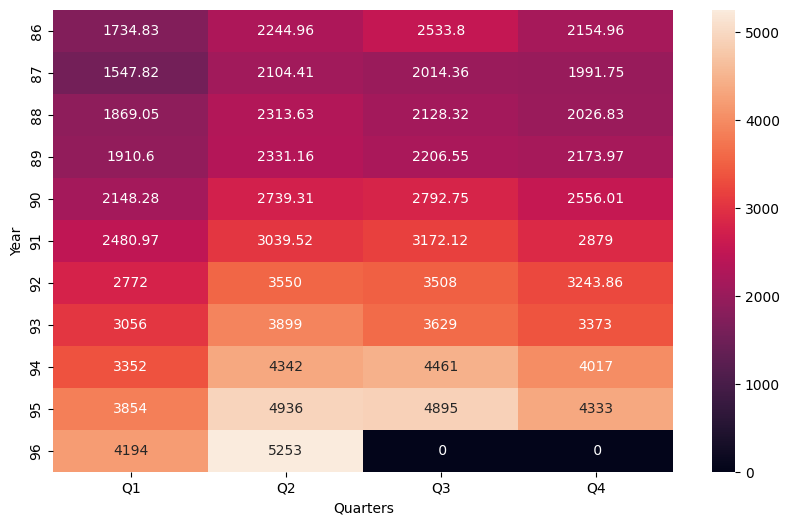

In [76]:
#Heat Map
plt.figure(figsize=(10,6))
Y_Quarter=pd.pivot_table(data=df1,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(Y_Quarter,annot=True,fmt="2g")

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

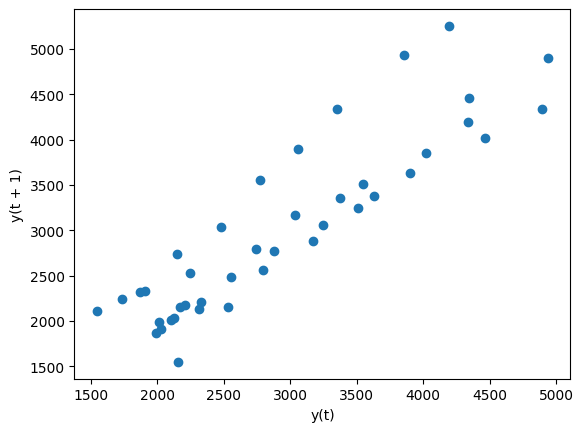

In [78]:
from pandas.plotting import lag_plot
lag_plot(df1.Sales)

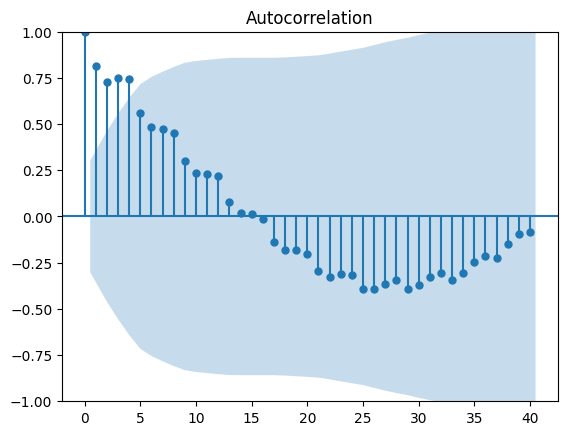

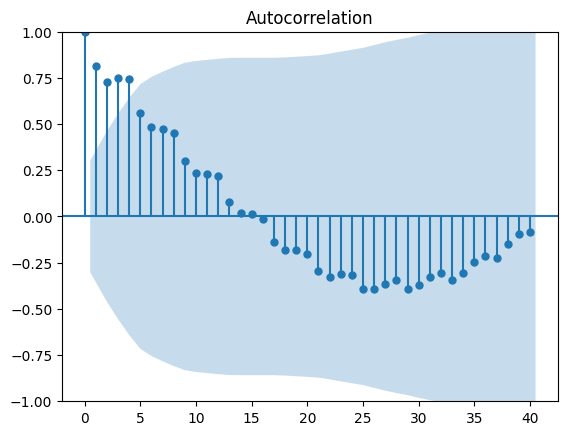

In [79]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1.Sales,lags=40)

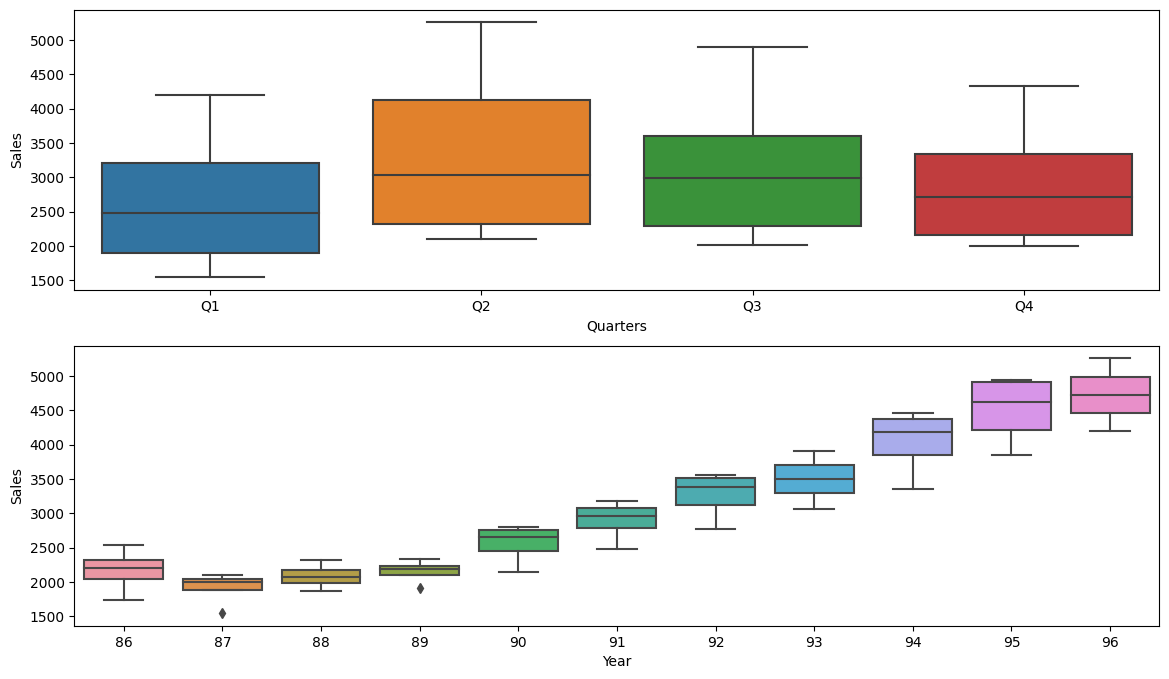

In [82]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=df1)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=df1)
plt.show()

<Axes: xlabel='Quarters', ylabel='Sales'>

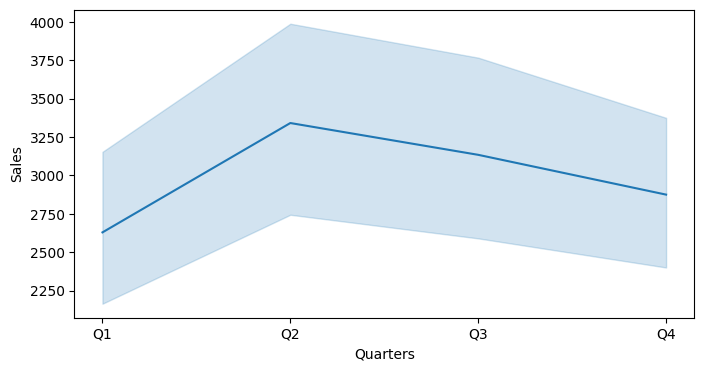

In [84]:
plt.figure(figsize=(8,4))
sns.lineplot(x="Quarters",y="Sales",data=df1)

In [88]:
train=df1.head(int(len(df1.Quarters)*0.9))
test=df1.tail(len(df1.Quarters)-len(train))

In [90]:
train.shape, test.shape

((37, 11), (5, 11))

In [107]:
#Linear Model
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear = linear_model.predict(test['t'])
rmse_linear = np.sqrt(np.mean(((test["Sales"])-pred_linear))**2)
rmse_linear

613.0885797796321

In [108]:
#Exponential
exp_model=smf.ols("Log_Sales~t",data=train).fit()
pred_exp_model=exp_model.predict(test["t"])
rmse_exp_model=np.sqrt(np.mean((test["Sales"])-pred_exp_model))**2
rmse_exp_model

4713.830639625366

In [93]:
#Quadratic
Quad=smf.ols("Sales~t+t_square",data=train).fit()
pred_Quad=Quad.predict(test[["t","t_square"]])
rmse_Quad=np.sqrt(np.mean((test["Sales"])-(np.array(pred_Quad)))**2)
rmse_Quad

37.60399333785608

In [109]:
#Additive seasonality
Add_sea=smf.ols("Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea=Add_sea.predict(test[["Q1","Q2","Q3","Q4"]])
rmse_add_sea=np.sqrt(np.mean(test["Sales"]-(np.array(pred_add_sea)))**2)
rmse_add_sea

1916.793673290675

In [110]:
#Additive Seasonality Quadratic
add_sea_quad=smf.ols("Sales~t+t_square+Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea_quad=add_sea_quad.predict(test[["t","t_square","Q1","Q2","Q3","Q4"]])
rmse_add_sea_quad=np.sqrt(np.mean(test["Sales"]-np.array((pred_add_sea_quad)))**2)
rmse_add_sea_quad

108.68666897485892

In [111]:
# Multiplicative Seasonality
mul_sea=smf.ols("Log_Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_Mult_sea=mul_sea.predict(test[["Log_Sales","Q1","Q2","Q3","Q4"]])
rmse_Mult_sea=np.sqrt(np.mean(test["Sales"]-(np.array(np.exp(pred_Mult_sea))))**2)
rmse_Mult_sea

2009.5556325551381

In [112]:
#Multiplicative Additive Seasonality
mul_add_sea=smf.ols("Log_Sales~t+Q1+Q2+Q3+Q4",data=train).fit()
pred_mul_add_sea=mul_add_sea.predict(test)
rmse_mul_add_sea=np.sqrt(np.mean(test["Sales"]-(np.array(pred_mul_add_sea)))**2)
rmse_mul_add_sea

4713.803270264603

In [113]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp_model","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_mul_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp_model,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,37.603993
4,rmse_add_sea_quad,108.686669
0,rmse_linear,613.088580
3,rmse_add_sea,1916.793673
5,rmse_Mult_sea,2009.555633
6,rmse_mul_add_sea,4713.803270
1,rmse_exp_model,4713.830640


In this Forecasting problem, 'Quadratic' model showed the best performance.